## Linear Regression

In [54]:
import pandas as pd

# Part 1: Create the dataset
data = {
    'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Study time in hours
    'y': [2, 3, 4, 5, 5, 6, 7, 8, 9, 9]    # Scores out of 10
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to CSV
df.to_csv('data.csv', index=False)

print("CSV file 'data.csv' created.")


CSV file 'data.csv' created.


Epoch 0 | Weight: [0.638] | Bias: 0.0116
Epoch 100 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 200 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 300 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 400 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 500 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 600 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 700 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 800 | Weight: [1.05107084] | Bias: 0.019110378912685327
Epoch 900 | Weight: [1.05107084] | Bias: 0.019110378912685327
RMSE: 0.7746300252894925
Learned weight: [1.05107084]
Learned bias: 0.019110378912685327
Pedhazur B0: 1.3999999999999995
Pedhazur B1: 0.8
Calculus B0: 1.4000000000000008
Calculus B1: 0.8000000000000002

Predicted score for 10 hours (Pedhazur): 9.399999999999999
Predicted score for 10 hours (Calculus): 9.400000000000002


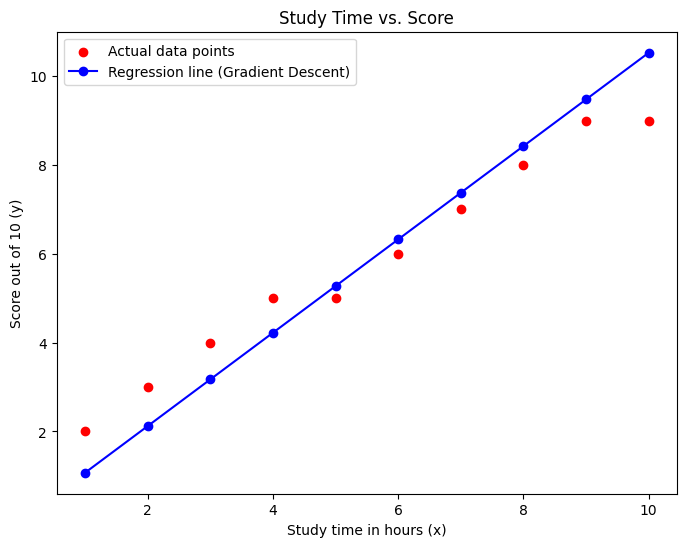

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weight = None
        self.bias = None
        
    def fit(self, X, y, epochs=100, alpha=0.001):  # Reduced learning rate to 0.001
        X = X.reshape(-1, 1)  # Ensure X is 2D
        num_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0.0

        # Gradient descent
        for epoch in range(epochs):
            y_pred = self.predict(X)
            weight_gradient = -2 * np.sum((y - y_pred) * X) / num_samples
            bias_gradient = -2 * np.sum(y - y_pred) / num_samples
            self.weight -= alpha * weight_gradient
            self.bias -= alpha * bias_gradient

            # Optional: Debugging output to track gradients and weights
            if epoch % 100 == 0:
                print(f"Epoch {epoch} | Weight: {self.weight} | Bias: {self.bias}")

    def pedhazur(self, X, y):
        # Calculate the means
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate covariance of X and y and variance of X
        cov_xy = np.sum((X - X_mean) * (y - y_mean))
        var_x = np.sum((X - X_mean) ** 2)
        
        # Calculate B1 (slope) and B0 (intercept)
        B1 = cov_xy / var_x
        B0 = y_mean - B1 * X_mean

        print(f"Pedhazur B0: {B0}")
        print(f"Pedhazur B1: {B1}")
        
        return B0, B1

    def calculus(self, X, y):
        X_b = np.c_[np.ones_like(X), X]

        # Calculate coefficients using the normal equation
        coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

        b0_calculus, b1_calculus = coefficients

        print(f"Calculus B0: {b0_calculus}")
        print(f"Calculus B1: {b1_calculus}")
        return b0_calculus, b1_calculus

    def predict(self, X):
        if self.weight is None or self.bias is None:
            raise ValueError("Model has not been trained yet.")
        return X @ self.weight + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
df = pd.read_csv('data.csv')
X = df['x'].values
y=df['y'].values


# Train the model using gradient descent
model = LinearRegression()
model.fit(X, y, epochs=1000, alpha=0.001)  # Adjusted learning rate

# Predict responses
y_pred = model.predict(X.reshape(-1, 1))

# Display MSE
mse = model.mean_squared_error(y, y_pred)
print(f"RMSE: {np.sqrt(mse)}")
print(f"Learned weight: {model.weight}")
print(f"Learned bias: {model.bias}")

# Calculate coefficients using Pedhazur formula
b0_pedhazur, b1_pedhazur = model.pedhazur(X, y)

# Calculate coefficients using Calculus method
b0_calculus, b1_calculus = model.calculus(X, y)

# Predict score for 10 hours study time
predicted_score_10hrs_pedhazur = b0_pedhazur + b1_pedhazur * 10
predicted_score_10hrs_calculus = b0_calculus + b1_calculus * 10

print(f"\nPredicted score for 10 hours (Pedhazur): {predicted_score_10hrs_pedhazur}")
print(f"Predicted score for 10 hours (Calculus): {predicted_score_10hrs_calculus}")

# Part 2c: Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Actual data points')
plt.plot(X, y_pred, color='blue', marker = 'o', label='Regression line (Gradient Descent)')
plt.xlabel('Study time in hours (x)')
plt.ylabel('Score out of 10 (y)')
plt.title('Study Time vs. Score')
plt.legend()
plt.show()


In [71]:
import numpy as np
import pandas as pd

class LinReg:
    def __init__(self, x, y, epochs=1000, learning_rate=0.01):
        self.x = x
        self.y = y
        self.weight = None
        self.bias = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def fit(self, x, y):
        n_samples = x.shape[0]
        n_features = x.shape[1]  # Number of features in x
        
        # Initialize weights and bias
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent loop
        for _ in range(self.epochs):
            y_pred = self.predict(x)
            
            # Calculate gradients
            dw = -(2/n_samples) * np.dot(x.T, (y - y_pred))  # Gradient for weights
            db = -(2/n_samples) * np.sum(y - y_pred)  # Gradient for bias
            
            # Update weights and bias
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def pedhazur(self, x, y):
        if x.ndim > 1:
            x = x.flatten()  
            
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        
        cov_xy = np.sum((x - x_mean) * (y - y_mean))
        var_x = np.sum((x - x_mean) ** 2)

        b1 = cov_xy / var_x
        b0 = y_mean - b1 * x_mean
        return b1, b0
    
    def calculus(self, x, y):
        """Computes weights using the Normal Equation."""
        # Add a column of ones for the bias term
        x_b = np.c_[np.ones((x.shape[0])), x]
        weights = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
        return weights
    
    def predict(self, x_test):
        """Predicts values using the learned weights and bias."""
        return np.dot(x_test, self.weight) + self.bias

# Example usage
df = pd.read_csv("data.csv")
x = df['x'].values.reshape(-1, 1)  # Ensuring x is a 2D array for compatibility
y = df['y'].values

# Create an instance of LinReg
lr = LinReg(x, y)

# Fit the model
lr.fit(x, y)

# Print the learned weight and bias
print(f"Learned Weight: {lr.weight}, Bias: {lr.bias}")

# Using Pedhazur's method
b1, b0 = lr.pedhazur(x, y)
print(f"Pedhazur's method - Slope (b1): {b1}, Intercept (b0): {b0}")

# Using Normal Equation (calculus method)
weights = lr.calculus(x, y)
print(f"Normal Equation weights (including bias): {weights}")


Learned Weight: [0.80268945], Bias: 1.3812765404760055
Pedhazur's method - Slope (b1): 0.8, Intercept (b0): 1.3999999999999995
Normal Equation weights (including bias): [1.4 0.8]


## Polynimial Regression

Linear Regression Coefficients: Intercept = 2.30630630630631, Slope = 0.006756756756756771
Polynomial Regression Coefficients: Intercept = 7.960481099653949, Linear Coef = -0.15371134020614519, Quadratic Coef = 0.0010756013745702197


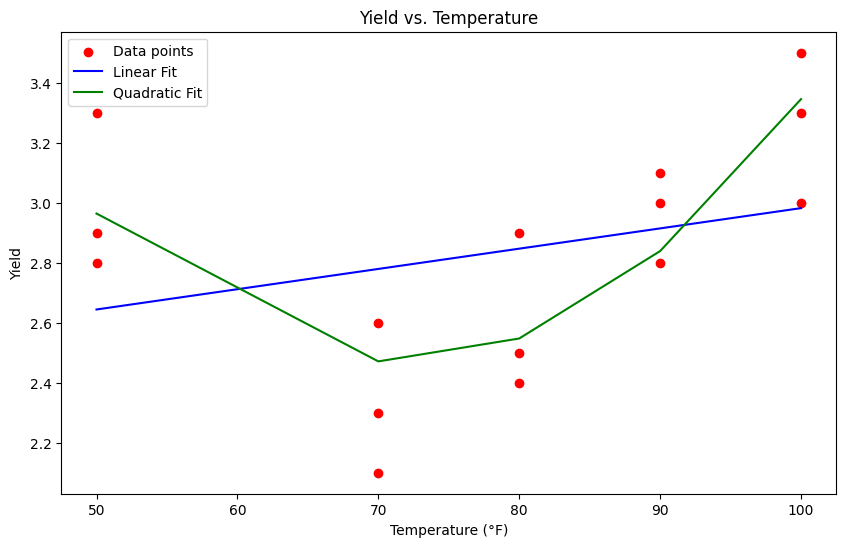

Linear Regression - MSE: 0.1327087087087087, RMSE: 0.364292065119059
Polynomial Regression - MSE: 0.047784650630011485, RMSE: 0.2185970050801508


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

class RegressionModels:
    def __init__(self, file_path):
        # Load data during initialization
        self.df = pd.read_csv(file_path)
        self.X = self.df['Temp'].values
        self.y = self.df['Yield'].values

    def fit_linear_regression(self):
        # Linear Regression
        X_b = np.c_[np.ones(self.X.shape[0]), self.X]  # Add bias term
        theta_linear = inv(X_b.T @ X_b) @ X_b.T @ self.y
        intercept_linear, slope_linear = theta_linear
        return intercept_linear, slope_linear

    def fit_polynomial_regression(self, degree=2):
        X_poly = np.c_[np.ones(self.X.shape[0]), self.X, self.X**degree]  
        theta_poly = inv(X_poly.T @ X_poly) @ X_poly.T @ self.y
        return tuple(theta_poly)

    def fit_models(self):
        linear_coeffs = self.fit_linear_regression()
        poly_coeffs = self.fit_polynomial_regression()
        return linear_coeffs, poly_coeffs

    def plot_regression(self):
        linear_coeffs, poly_coeffs = self.fit_models()
        intercept_linear, slope_linear = linear_coeffs
        intercept_poly, linear_coef, quadratic_coef = poly_coeffs

        y_pred_linear = intercept_linear + slope_linear * self.X
        y_pred_poly = intercept_poly + linear_coef * self.X + quadratic_coef * self.X**2

        plt.figure(figsize=(10, 6))
        
        plt.scatter(self.X, self.y, color='red', label='Data points')

        plt.plot(self.X, y_pred_linear, color='blue', label='Linear Fit')

        plt.plot(self.X, y_pred_poly, color='green', label='Quadratic Fit')

        plt.xlabel('Temperature (°F)')
        plt.ylabel('Yield')
        plt.title('Yield vs. Temperature')
        plt.legend()

        plt.show()

    def compute_errors(self):
        linear_coeffs, poly_coeffs = self.fit_models()
        intercept_linear, slope_linear = linear_coeffs
        intercept_poly, linear_coef, quadratic_coef = poly_coeffs

        y_pred_linear = intercept_linear + slope_linear * self.X
        y_pred_poly = intercept_poly + linear_coef * self.X + quadratic_coef * self.X**2

        mse_linear = np.mean((self.y - y_pred_linear) ** 2)
        rmse_linear = np.sqrt(mse_linear)
        
        mse_poly = np.mean((self.y - y_pred_poly) ** 2)
        rmse_poly = np.sqrt(mse_poly)

        return (mse_linear, rmse_linear), (mse_poly, rmse_poly)

model = RegressionModels('yield_data.csv')
linear_coeffs, poly_coeffs = model.fit_models()
print(f"Linear Regression Coefficients: Intercept = {linear_coeffs[0]}, Slope = {linear_coeffs[1]}")
print(f"Polynomial Regression Coefficients: Intercept = {poly_coeffs[0]}, Linear Coef = {poly_coeffs[1]}, Quadratic Coef = {poly_coeffs[2]}")

model.plot_regression()

linear_errors, poly_errors = model.compute_errors()
print(f"Linear Regression - MSE: {linear_errors[0]}, RMSE: {linear_errors[1]}")
print(f"Polynomial Regression - MSE: {poly_errors[0]}, RMSE: {poly_errors[1]}")


## Naive Bayes

Epoch 0 | Weight: [0.913] | Bias: 0.0166
Epoch 100 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 200 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 300 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 400 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 500 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 600 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 700 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 800 | Weight: [1.50411862] | Bias: 0.0273476112026359
Epoch 900 | Weight: [1.50411862] | Bias: 0.0273476112026359
RMSE: 0.3504937596428551
Learned weight: [1.50411862]
Learned bias: 0.0273476112026359
Pedhazur B0: 0.06666666666666643
Pedhazur B1: 1.496969696969697
Calculus B0: 0.0666666666666682
Calculus B1: 1.496969696969697

Predicted score for 10 hours (Pedhazur): 15.036363636363637
Predicted score for 10 hours (Calculus): 15.036363636363639


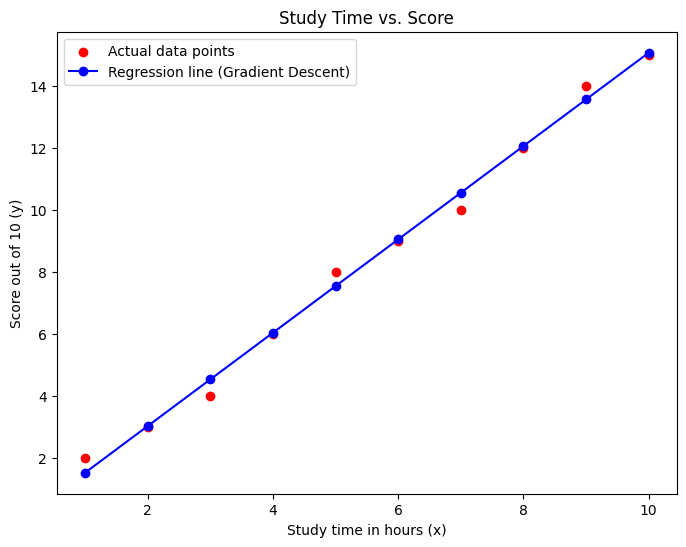

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weight = None
        self.bias = None
        
    def fit(self, X, y, epochs=100, alpha=0.001):  # Reduced learning rate to 0.001
        X = X.reshape(-1, 1)  # Ensure X is 2D
        num_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0.0

        # Gradient descent
        for epoch in range(epochs):
            y_pred = self.predict(X)
            weight_gradient = -2 * np.sum((y - y_pred) * X) / num_samples
            bias_gradient = -2 * np.sum(y - y_pred) / num_samples
            self.weight -= alpha * weight_gradient
            self.bias -= alpha * bias_gradient

            # Optional: Debugging output to track gradients and weights
            if epoch % 100 == 0:
                print(f"Epoch {epoch} | Weight: {self.weight} | Bias: {self.bias}")

    def pedhazur(self, X, y):
        # Calculate the means
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate covariance of X and y and variance of X
        cov_xy = np.sum((X - X_mean) * (y - y_mean))
        var_x = np.sum((X - X_mean) ** 2)
        
        # Calculate B1 (slope) and B0 (intercept)
        B1 = cov_xy / var_x
        B0 = y_mean - B1 * X_mean

        print(f"Pedhazur B0: {B0}")
        print(f"Pedhazur B1: {B1}")
        
        return B0, B1

    def calculus(self, X, y):
        X_b = np.c_[np.ones_like(X), X]

        # Calculate coefficients using the normal equation
        coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

        b0_calculus, b1_calculus = coefficients

        print(f"Calculus B0: {b0_calculus}")
        print(f"Calculus B1: {b1_calculus}")
        return b0_calculus, b1_calculus

    def predict(self, X):
        if self.weight is None or self.bias is None:
            raise ValueError("Model has not been trained yet.")
        return X @ self.weight + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
df = pd.read_csv('data.csv')
X = df['x'].values
y=df['y'].values


# Train the model using gradient descent
model = LinearRegression()
model.fit(X, y, epochs=1000, alpha=0.001)  # Adjusted learning rate

# Predict responses
y_pred = model.predict(X.reshape(-1, 1))

# Display MSE
mse = model.mean_squared_error(y, y_pred)
print(f"RMSE: {np.sqrt(mse)}")
print(f"Learned weight: {model.weight}")
print(f"Learned bias: {model.bias}")

# Calculate coefficients using Pedhazur formula
b0_pedhazur, b1_pedhazur = model.pedhazur(X, y)

# Calculate coefficients using Calculus method
b0_calculus, b1_calculus = model.calculus(X, y)

# Predict score for 10 hours study time
predicted_score_10hrs_pedhazur = b0_pedhazur + b1_pedhazur * 10
predicted_score_10hrs_calculus = b0_calculus + b1_calculus * 10

print(f"\nPredicted score for 10 hours (Pedhazur): {predicted_score_10hrs_pedhazur}")
print(f"Predicted score for 10 hours (Calculus): {predicted_score_10hrs_calculus}")

# Part 2c: Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Actual data points')
plt.plot(X, y_pred, color='blue', marker = 'o', label='Regression line (Gradient Descent)')
plt.xlabel('Study time in hours (x)')
plt.ylabel('Score out of 10 (y)')
plt.title('Study Time vs. Score')
plt.legend()
plt.show()


[1.4 0.8]


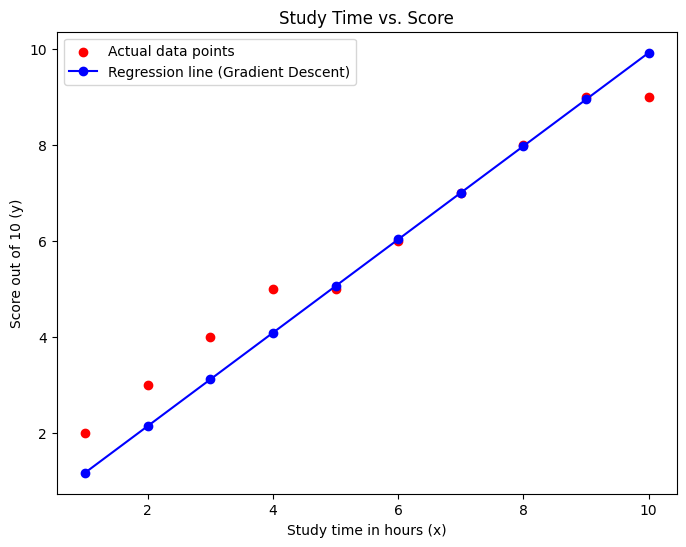

In [ ]:
class lin:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.epoch = 100
        self.lr = 0.001

    def fit(self,x,y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            y_pred = self.predict(x)
            dw = -2*np.dot(y-y_pred, x)/n_samples
            db = -2*np.sum(y-y_pred)/n_samples

            self.weights -= self.lr*dw
            self.bias -= self.lr*db


    def calculus(self,x,y):
        x_b = np.c_[np.ones_like(x),x]
        return np.linalg.inv(x_b.T@x_b)@x_b.T@y
    
    def pedhazur(self,x,y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)

        cov_xy = np.sum((x-x_mean)*(y-y_mean))
        var_x = np.sum((x - x_mean)**2)

        b1 = cov_xy/var_x
        return b1



    def predict(self,x):
        return np.dot(x,self.weights)+self.bias

df = pd.read_csv('data.csv')
X = df['x'].values.reshape(-1,1)
y=df['y'].values


# Train the model using gradient descent
model = lin()
model.fit(X, y)  # Adjusted learning rate
print(model.calculus(x,y))
# Predict responses
y_pred = model.predict(X.reshape(-1, 1))

# # Display MSE
# mse = model.mean_squared_error(y, y_pred)
# print(f"RMSE: {np.sqrt(mse)}")
# print(f"Learned weight: {model.weight}")
# print(f"Learned bias: {model.bias}")

# # Calculate coefficients using Pedhazur formula
# b0_pedhazur, b1_pedhazur = model.pedhazur(X, y)

# # Calculate coefficients using Calculus method
# b0_calculus, b1_calculus = model.calculus(X, y)

# # Predict score for 10 hours study time
# predicted_score_10hrs_pedhazur = b0_pedhazur + b1_pedhazur * 10
# predicted_score_10hrs_calculus = b0_calculus + b1_calculus * 10

# print(f"\nPredicted score for 10 hours (Pedhazur): {predicted_score_10hrs_pedhazur}")
# print(f"Predicted score for 10 hours (Calculus): {predicted_score_10hrs_calculus}")

# # Part 2c: Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', label='Actual data points')
plt.plot(X, y_pred, color='blue', marker = 'o', label='Regression line (Gradient Descent)')
plt.xlabel('Study time in hours (x)')
plt.ylabel('Score out of 10 (y)')
plt.title('Study Time vs. Score')
plt.legend()
plt.show()


In [8]:
import pandas as pd
from collections import defaultdict

# Sample training data
data = {
    "age": ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40", "31...40", ">40"],
    "income": ["high", "high", "high", "medium", "low", "low", "low", "medium", "low", "medium", "medium", "medium", "high", "medium"],
    "student": ["no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "yes", "yes", "yes", "no", "no"],
    "credit_rating": ["fair", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "excellent"],
    "computer": ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]
}

# Load data into a DataFrame
df = pd.DataFrame(data)

df.to_csv("words.csv",index=False)



In [ ]:
# Naive Bayes Classifier
class NaiveBayesClassifier:
    def __init__(self):
        self.priors = {}
        self.likelihoods = defaultdict(dict)

    def fit(self, df, target):
        # Calculate prior probabilities
        self.priors = df[target].value_counts(normalize=True).to_dict()
        
        # Calculate likelihoods for each feature value given the target class
        for feature in df.columns:
            if feature != target:
                for outcome in df[target].unique():
                    subset = df[df[target] == outcome]
                    self.likelihoods[outcome][feature] = subset[feature].value_counts(normalize=True).to_dict()
    
    def predict(self, input_data):
        posteriors = {}
        for outcome, prior in self.priors.items():
            posterior = prior  # Start with the prior probability
            for feature, value in input_data.items():
                likelihood = self.likelihoods[outcome][feature].get(value, 0)
                posterior *= likelihood  # Multiply by the likelihood
            posteriors[outcome] = posterior
        return max(posteriors, key=posteriors.get), posteriors
    
df = pd.read_csv("words.csv")

# Initialize and train the model
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(df, target="computer")

# Predict for a new data point
input_data = {"age": "<=30", "income": "medium", "student": "yes", "credit_rating": "fair"}
predicted_class, posteriors = nb_classifier.predict(input_data)

print(f"Predicted Class: {predicted_class}")
print("Posterior Probabilities:", posteriors)


     age  income student credit_rating computer
0   <=30    high      no          fair       no
1   <=30    high      no     excellent       no
5    >40     low     yes     excellent       no
7   <=30  medium      no          fair       no
13   >40  medium      no     excellent       no
        age  income student credit_rating computer
2   31...40    high      no          fair      yes
3       >40  medium      no          fair      yes
4       >40     low     yes          fair      yes
6   31...40     low     yes     excellent      yes
8      <=30     low     yes          fair      yes
9       >40  medium     yes          fair      yes
10     <=30  medium     yes     excellent      yes
11  31...40  medium     yes     excellent      yes
12  31...40    high      no          fair      yes
     age  income student credit_rating computer
0   <=30    high      no          fair       no
1   <=30    high      no     excellent       no
5    >40     low     yes     excellent       no
7   <=30  

In [ ]:
class NB:
    def __init__(self):
        self.priors = {}
        self.likelyhood = defaultdict(dict)
        
    def fit(self, df, target):
        # Calculate prior probabilities
        self.priors = df[target].value_counts(normalize=True).to_dict()
        
        # Calculate likelihoods for each feature value given the target class
        for feature in df.columns:
            if feature != target:
                for outcome in df[target].unique():
                    subset = df[df[target] == outcome]
                    self.likelyhood[outcome][feature] = subset[feature].value_counts(normalize=True).to_dict()
    

    def predict(self,input):
        posteriors = {}
        for outcome, value in self.priors.items():
            prob = value
            for feature,val in input.items():
                temp = self.likelyhood[outcome][feature].get(val)
                prob = prob*temp
            posteriors[outcome] = prob
        return posteriors
            
df = pd.read_csv("words.csv")

# Initialize and train the model
nb_classifier = NB()
nb_classifier.fit(df, target="computer")

# Predict for a new data point
input_data = {"age": "<=30", "income": "medium", "student": "yes", "credit_rating": "fair"}
posteriors = nb_classifier.predict(input_data)

print("Posterior Probabilities:", posteriors)

            

Posterior Probabilities: {'yes': 0.02821869488536155, 'no': 0.006857142857142858}


In [83]:
class NB:
    def __init__(self):
        self.priors = {}
        self.lieklyhoods = defaultdict(dict)

    def fit(self,df,target):
        self.priors = df[target].value_counts(normalize = True).to_dict()

        for feature in df.columns:
            if feature != target:
                for outcome in df[target].unique():
                    subset = df[df[target]==outcome]
                    self.lieklyhoods[outcome][feature] = subset[feature].value_counts(normalize=True).to_dict()

    def predict(self,input):
        posteriors = {}
        for prior, value in self.priors.items():
            prob = value
            for feature, values in input.items():
                temp = self.lieklyhoods[prior][feature].get(values)
                prob = prob*temp
            posteriors[prior] = prob
        return posteriors

df = pd.read_csv("words.csv")

# Initialize and train the model
nb_classifier = NB()
nb_classifier.fit(df, target="computer")

# Predict for a new data point
input_data = {"age": "<=30", "income": "medium", "student": "yes", "credit_rating": "fair"}
posteriors = nb_classifier.predict(input_data)

print("Posterior Probabilities:", posteriors)



Posterior Probabilities: {'yes': 0.02821869488536155, 'no': 0.006857142857142858}


In [ ]:
def calculate_metrics(true_labels, predicted_labels):
    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = sum((true == "yes" and pred == "yes") for true, pred in zip(true_labels, predicted_labels))
    tn = sum((true == "no" and pred == "no") for true, pred in zip(true_labels, predicted_labels))
    fp = sum((true == "no" and pred == "yes") for true, pred in zip(true_labels, predicted_labels))
    fn = sum((true == "yes" and pred == "no") for true, pred in zip(true_labels, predicted_labels))

    # Calculate metrics
    accuracy = (tp + tn) / len(true_labels)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return {"accuracy": accuracy, "precision": precision, "recall": recall}


## Logistic Regression

In [20]:
import pandas as pd

# Create the training data
data = {
    'Hours of Study': [1, 2, 3, 4, 5, 6, 7, 8],
    'Pass': [0, 0, 0, 0, 1, 1, 1, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('study_data.csv', index=False)


In [ ]:
class lin:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.epoch = 100
        self.lr = 0.001

    def fit(self,x,y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            y_pred = self.predict(x)
            dw = -2*np.dot(y-y_pred, x)/n_samples
            db = -2*np.sum(y-y_pred)/n_samples

            self.weights -= self.lr*dw
            self.bias -= self.lr*db


    def calculus(self,x,y):
        x_b = np.c_[np.ones_like(x),x]
        return np.linalg.inv(x_b.T@x_b)@x_b.T@y
    
    def pedhazur(self,x,y):
        x_mean = np.mean(x)
        y_mean = np.mean(y)

        cov_xy = np.sum((x-x_mean)*(y-y_mean))
        var_x = np.sum((x - x_mean)**2)

        b1 = cov_xy/var_x
        return b1



    def predict(self,x):
        return np.dot(x,self.weights)+self.bias

Custom Model Coefficients: [1.74427359] -7.632308076009153
Accuracy of custom model: 1.00
Probability of passing if studying for 3.5 hours: 0.1784
Probability of passing if studying for 7.5 hours: 0.9957


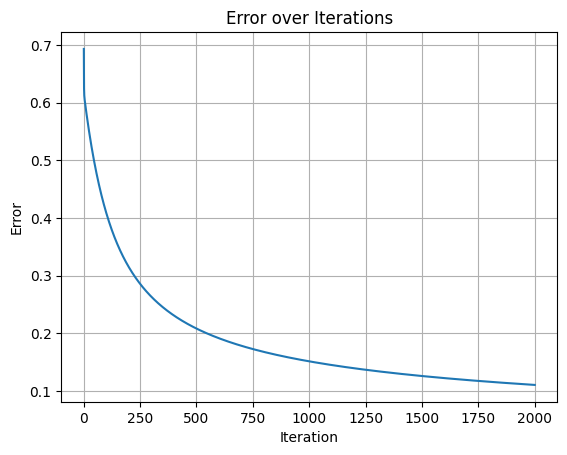

In [35]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calculate the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute error for this iteration
            error = -np.mean(y * np.log(y_predicted ) + (1 - y) * np.log(1 - y_predicted))
            self.errors.append(error)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_predicted]

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

# Load data from CSV
data = pd.read_csv('study_data.csv')
X = data[['Hours of Study']].values
y = data['Pass'].values

# Fit our logistic regression model
model_gd = LogisticRegressionGD(learning_rate=0.1, epochs=2000)
model_gd.fit(X, y)

# Compare coefficients
print("Custom Model Coefficients:", model_gd.weights,model_gd.bias)

# Predictions and accuracy calculation
predictions_gd = model_gd.predict(X)
accuracy_gd = np.mean(predictions_gd == y)
print(f"Accuracy of custom model: {accuracy_gd:.2f}")

# Predict probabilities for specific hours of study
hours_to_predict = np.array([[3.5], [7.5]])
probabilities = model_gd.predict_proba(hours_to_predict)

for hour, prob in zip([3.5, 7.5], probabilities):
    print(f"Probability of passing if studying for {hour} hours: {prob:.4f}")

import matplotlib.pyplot as plt

plt.plot(range(1, len(model_gd.errors) + 1), model_gd.errors)
plt.title('Error over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid()
plt.show()

